In [2]:
import warnings

# Coisa do Windows

# Ignorar o warning específico do KMeans
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")
# Voltar ao normal
# warnings.filterwarnings("default")

# Trabalho Prático 1 de Ciência de Dados

## Download e leitura

#### Download dos dados

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg' -O filmes.csv

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'id' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


#### Leitura dos dados

In [4]:
import pandas as pd

filmes_df = pd.read_csv("filmes.csv")
# filmes_df = filmes_df.sample(n=1000)
filmes_df.head()

,genres,averageRating,numVotes,sinopse,primaryTitle,startYear,runtimeMinutes,actors_names,directors_names
0,Family,7.1,387992,When two kids find and play a magical board ga...,Jumanji,1995,104,['Robin Williams' 'Jonathan Hyde' 'Jonathan Hy...,['Joe Johnston']
1,Romance,6.7,30265,John and Max resolve to save their beloved bai...,Grumpier Old Men,1995,101,['Walter Matthau' 'Jack Lemmon' 'Burgess Mered...,['Howard Deutch']
2,Romance,6.0,12585,"Based on Terry McMillan's novel, this film fol...",Waiting to Exhale,1995,124,['Gregory Hines' 'Dennis Haysbert' 'Mykelti Wi...,['Forest Whitaker']
3,"Romance,Family",6.1,42555,George Banks must deal not only with his daugh...,Father of the Bride Part II,1995,106,['Steve Martin' 'Martin Short' 'George Newbern...,['Charles Shyer']
4,"Crime,Action",8.3,738636,A group of high-end professional thieves start...,Heat,1995,170,['Al Pacino' 'Robert De Niro' 'Val Kilmer' 'Jo...,['Michael Mann']


## Pré-processamento dos dados

In [5]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alanz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
from nltk import sent_tokenize, word_tokenize

#### Convertendo os tokens

In [7]:
!pip install unidecode

In [8]:
import string
import unidecode

Convertendo todos os tokens para letras minúsculas

In [9]:
def tokens_low(tokens):
  return [w.lower() for w in tokens]

Removendo os símbolos de pontuação

In [10]:
table = str.maketrans('', '', string.punctuation)

In [11]:
def tokens_pontuacao(tokens):
  return [w.translate(table) for w in tokens]

Convertendo carcteres especiais

In [12]:
def tokens_char_especical(tokens):
  return [unidecode.unidecode(w).lower() for w in tokens]

#### Filtrando apenas palavras

Extraindo apenas as palavras da lista de tokens

In [13]:
def tokens_apenas_words(tokens):
  return [word for word in tokens if word.isalpha()]

Removendo stop words

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alanz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
def tokens_stop_words(tokens):
  return [word for word in tokens if not word in stop_words]

#### Stemming

In [17]:
from nltk.stem.porter import PorterStemmer

In [18]:
porter = PorterStemmer()

In [19]:
def tokens_stemming(tokens):
  return [porter.stem(word) for word in tokens]

#### Tokenizer Personalizado

In [81]:
def tokenizer_personalizado(texto):
  tokens = word_tokenize(texto)

  tokens = tokens_low(tokens)
  tokens = tokens_pontuacao(tokens)
  tokens = tokens_char_especical(tokens)
  tokens = tokens_apenas_words(tokens)
  tokens = tokens_stop_words(tokens)
  tokens = tokens_stemming(tokens)

  return tokens

## Construção da matriz de TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [142]:
# Cada linha do array é uma sinopse
D = [sin for sin in filmes_df.sinopse]

### Usando Tokenizer Personalizado

In [143]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer_personalizado, max_features=3500, max_df=0.8, ngram_range=(1,3))

In [ ]:
vectorizer = TfidfVectorizer(max_df=2)

In [144]:
X = vectorizer.fit_transform(D)

c:\Users\alanz\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X.todense()

In [145]:
all_words = vectorizer.get_feature_names_out()
dense = X.todense()
dense_list = dense.tolist()

In [146]:
all_keywords = []
for des in dense_list:
    x = 0
    keywords = []
    for word in des:
        if word > 0:
            keywords.append(all_words[x])
        x += 1
    all_keywords.append(keywords)

In [26]:
df = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
df

,abandoned,abducted,ability,able,aboard,abusive,accept,accepts,accident,accidentally,...,young couple,young girl,young man,young woman,young women,younger,younger brother,youth,zombie,zombies
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30353,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30354,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30355,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30356,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.265165,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Redução de dimensionalidade

In [27]:
import matplotlib.pyplot as plt
import numpy as np

### Usando SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
svd = make_pipeline(TruncatedSVD(n_components=2000), Normalizer(copy=False))

In [ ]:
svd.fit(X)

In [ ]:
fig = plt.figure(figsize=(7, 5))
plt.plot([i for i in range(1, svd[0].n_components + 1)], np.cumsum(svd[0].explained_variance_ratio_))
plt.xlabel(r'$k$ - Número de componentes principais')
plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada')

In [ ]:
X_REDUCED = svd.transform(X)

In [147]:
X_REDUCED = X

In [ ]:
X_REDUCED

## K-means

In [30]:
from sklearn.cluster import KMeans

### Verificando o K-means - Escolha do K

In [68]:
import sklearn.metrics as metrics
import seaborn as sns

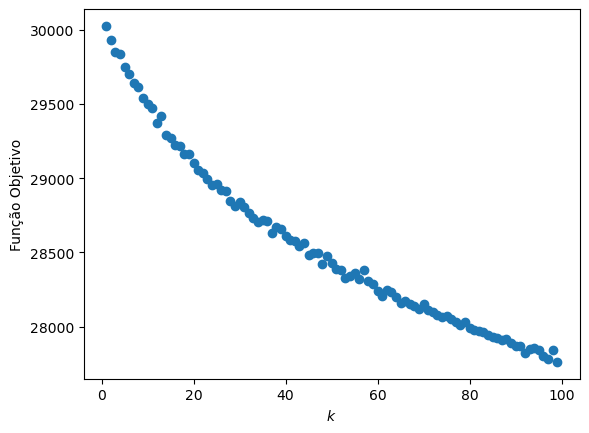

In [148]:
inertia = []
max_groups = 100
for i in range(1, max_groups):
  km = KMeans(n_clusters = i)
  km.fit(X_REDUCED)
  inertia.append(km.inertia_)

plt.scatter(range(1, max_groups), inertia)
_ = plt.ylabel("Função Objetivo")
_ = plt.xlabel(r"$k$")

### Não Rode

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = X_REDUCED

range_n_clusters = [5, 6, 9, 10, 12, 40]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

### Rode

In [158]:
k_groups = 200
kmeans = KMeans(n_clusters = k_groups)
kmeans.fit(X_REDUCED)
y_kmeans = kmeans.predict(X_REDUCED)

### Analise dos Grupos

In [159]:
filmes_df_g = filmes_df
filmes_df_g['Tokens'] = all_keywords
filmes_df_g['Grupos'] = y_kmeans
# filmes_df_g

In [160]:
filmes_df_g['GenerosL'] = filmes_df_g['genres']
filmes_df_g['GenerosL'] = filmes_df_g['GenerosL'].apply(lambda x: x.split(sep=','))
# filmes_df_g

In [136]:
de_filmes = filmes_df_g.explode('GenerosL')

In [137]:
my_df = de_filmes[(de_filmes['GenerosL'].isin(['Sport', 'Action'])) & (de_filmes['Grupos'] == 0)]
my_df

,genres,averageRating,numVotes,sinopse,primaryTitle,startYear,runtimeMinutes,actors_names,directors_names,Tokens,Grupos,GenerosL
52,"Romance,Action",4.4,14111,Max Kirkpatrick is a cop who protects Kate McQ...,Fair Game,1995,91,['William Baldwin' 'Steven Berkoff' 'Christoph...,['Andrew Sipes'],"[attorney, civil, cop, kate, law, max, protect...",0,Action
106,Action,5.3,49625,When an expedition to the African Congo ends i...,Congo,1995,109,['Tim Curry' 'Dylan Walsh' 'Ernie Hudson' 'Gra...,['Frank Marshall'],"[african, assembl, disast, end, expedit, find,...",0,Action
146,Action,5.6,21921,A tough cop teams up with a professional skydi...,Drop Zone,1994,101,['Wesley Snipes' 'Gary Busey' 'Michael Jeter' ...,['John Badham'],"[captur, comput, cop, hacker, law, profession,...",0,Action
322,Action,6.6,99185,"""Rambo"" parody in which Topper Harley leads a ...",Hot Shots! Part Deux,1993,86,['Charlie Sheen' 'Lloyd Bridges' 'Richard Cren...,['Jim Abrahams'],"[lead, previou, prison, rescu, save, team, war]",0,Action
393,"Sport,Family",6.2,11808,A young boy is bequeathed the ownership of a p...,Little Big League,1994,119,['Luke Edwards' 'Timothy Busfield' 'John Ashto...,['Andrew Scheinman'],"[basebal, boy, profession, team, young, young ...",0,Sport
...,...,...,...,...,...,...,...,...,...,...,...,...
29623,Sport,5.1,320,When the all-star player of the local high sch...,The Last Whistle,2019,87,"['Brad Leland' ""Jim O'Heir"" 'Les Miles' 'Eric ...",['Rob Smat'],"[coach, collaps, eye, footbal, footbal team, h...",0,Sport
29652,Action,7.1,6642,A possessed Ninja doll teams up with a teenage...,Checkered Ninja,2018,83,['Alfred Bjerre Larsen' 'Anders Matthesen' 'Fa...,['Thorbjørn Christoffersen' 'Anders Matthesen'],"[aveng, boy, child, doll, factori, murder, nin...",0,Action
29916,Sport,4.3,445,The film begins on the eve of the 2014 Olympic...,Some Like It Cold,2014,90,['Aleksandr Vedmenskiy' 'Ilya Glinnikov' 'Alek...,['Evgeniy Nevskiy'],"[adventur, alexand, alon, begin, bent, blackma...",0,Sport
29933,"Crime,Action",5.8,134,The main characters are above the law. They ar...,Slide,2013,117,['Vladislav Abashin' 'Aleksey Ignatev' 'Vladim...,['Anton Rozenberg'],"[activ, appear, back, begin, begin suspect, ch...",0,Action


In [138]:
sport_sin = my_df[my_df['GenerosL'] == 'Sport'].sinopse
for i in range(6):
    print(sport_sin.iloc[i])

A young boy is bequeathed the ownership of a professional baseball team.
A trained chimpanzee plays third base for a minor-league baseball team.
Two over-loyal Celtic fans kidnap their opponent's star player in order to guarantee their team the championship.
Down-on-his-luck race car driver Jim Douglas teams up with a little VW Bug that has a mind of it's own, not realizing Herbie's worth until a sneaky rival plots to steal him.
Ever wanted to know what guys say when they get together? This light- hearted comedy explores the male world through an amateur hockey team. Every male stereotype is analyzed, comically of course.
A lousy minor league baseball team full of many different personalities gets a new manager, an aging minor league pitcher.


In [139]:
sport_tok = my_df[my_df['GenerosL'] == 'Sport'].Tokens
for i in range(6):
    print(sport_tok.iloc[i])

['basebal', 'boy', 'profession', 'team', 'young', 'young boy']
['base', 'basebal', 'play', 'team', 'third', 'train']
['championship', 'fan', 'kidnap', 'order', 'player', 'star', 'team', 'two']
['car', 'driver', 'jim', 'littl', 'mind', 'plot', 'race', 'realiz', 'rival', 'steal', 'team', 'worth']
['amateur', 'comedi', 'comic', 'cours', 'ever', 'everi', 'explor', 'get', 'guy', 'heart', 'hockey', 'know', 'light', 'male', 'say', 'team', 'togeth', 'want', 'world']
['age', 'basebal', 'differ', 'full', 'get', 'leagu', 'manag', 'mani', 'minor', 'new', 'person', 'team']


In [140]:
horror_sin = my_df[my_df['GenerosL'] == 'Action'].sinopse
for i in range(6):
    print(horror_sin.iloc[i])

Max Kirkpatrick is a cop who protects Kate McQuean, a civil law attorney, from a renegade KGB team out to terminate her.
When an expedition to the African Congo ends in disaster, a new team is assembled to find out what went wrong.
A tough cop teams up with a professional skydiver to capture a renegade computer hacker on the run from the law.
"Rambo" parody in which Topper Harley leads a rescue team into Iraq to save Iraqi war prisoners and all of their previous rescue teams.
The unruly team of hockey misfits grows up a bit and receives scholarships to a prestigious prep school, where they take on the snotty varsity team.
A Hostage Negotiator teams up with a Sharpshooter to bring down a dangerous jewel thief.


In [141]:
horror_tok = my_df[my_df['GenerosL'] == 'Action'].Tokens
for i in range(6):
    print(horror_tok.iloc[i])

['attorney', 'civil', 'cop', 'kate', 'law', 'max', 'protect', 'renegad', 'team', 'termin']
['african', 'assembl', 'disast', 'end', 'expedit', 'find', 'new', 'team', 'went', 'wrong']
['captur', 'comput', 'cop', 'hacker', 'law', 'profession', 'renegad', 'run', 'team', 'tough']
['lead', 'previou', 'prison', 'rescu', 'save', 'team', 'war']
['bit', 'grow', 'hockey', 'misfit', 'prestigi', 'receiv', 'school', 'take', 'team']
['bring', 'danger', 'hostag', 'jewel', 'negoti', 'team', 'thief']


In [161]:
generosXgrupos = filmes_df_g[['GenerosL', 'Grupos']].explode('GenerosL')
generosXgrupos

,GenerosL,Grupos
0,Family,60
1,Romance,76
2,Romance,29
3,Romance,136
3,Family,136
...,...,...
30354,Biography,149
30355,Crime,108
30355,Horror,108
30356,Romance,18


In [162]:
generosXgrupos = generosXgrupos.groupby(['GenerosL', 'Grupos']).size().unstack(fill_value=0)
generosXgrupos

Grupos,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GenerosL,,,,,,,,,,,,,,,,,,,,,
Action,34,4,47,26,12,52,116,21,17,38,...,65,43,69,11,31,56,36,126,17,23
Biography,4,8,20,3,9,3,4,0,19,2,...,25,5,4,1,8,7,3,1,2,2
Crime,12,18,39,29,59,82,20,91,15,5,...,54,31,31,17,59,19,8,21,12,9
Family,6,41,15,17,8,14,3,2,9,2,...,10,0,3,2,5,10,3,27,6,5
Horror,8,30,45,21,46,9,3,45,12,55,...,37,7,8,6,61,114,59,48,21,30
Musical,3,2,6,10,3,4,0,3,9,1,...,14,3,1,5,2,1,1,3,1,0
Romance,21,36,74,53,106,37,7,16,59,7,...,77,3,11,16,17,17,7,9,26,15
Sci-Fi,1,7,15,7,6,11,4,4,6,42,...,20,5,31,2,14,123,20,26,9,11
Sport,3,0,12,2,0,1,10,0,3,0,...,4,1,0,3,1,0,1,3,3,0


In [163]:
generosXgrupos = generosXgrupos[generosXgrupos.sum().sort_values(ascending=False).index]
generosXgrupos

Grupos,181,57,124,94,160,19,89,18,71,61,...,72,135,179,162,177,42,22,159,110,101
GenerosL,,,,,,,,,,,,,,,,,,,,,
Action,474,59,48,76,64,39,53,60,35,92,...,6,2,10,15,2,23,6,7,4,5
Biography,195,115,16,15,13,9,11,12,86,15,...,0,2,13,2,0,1,0,3,5,0
Crime,450,110,52,107,98,75,202,71,37,50,...,18,2,10,26,4,20,6,5,4,11
Family,184,47,9,7,18,18,5,18,22,24,...,7,27,2,2,1,0,1,0,2,1
Horror,362,48,17,65,37,105,105,64,8,27,...,4,4,10,1,27,0,1,13,5,3
Musical,89,15,39,12,15,7,3,16,15,10,...,2,7,1,0,1,0,3,0,0,2
Romance,625,223,435,190,160,154,27,152,148,31,...,15,8,2,2,11,2,28,8,23,17
Sci-Fi,178,32,8,31,24,19,12,18,11,24,...,1,0,2,0,2,1,0,9,2,1
Sport,93,24,3,5,15,2,2,8,17,95,...,1,1,1,1,0,0,2,1,0,2


<Axes: xlabel='Grupos', ylabel='GenerosL'>

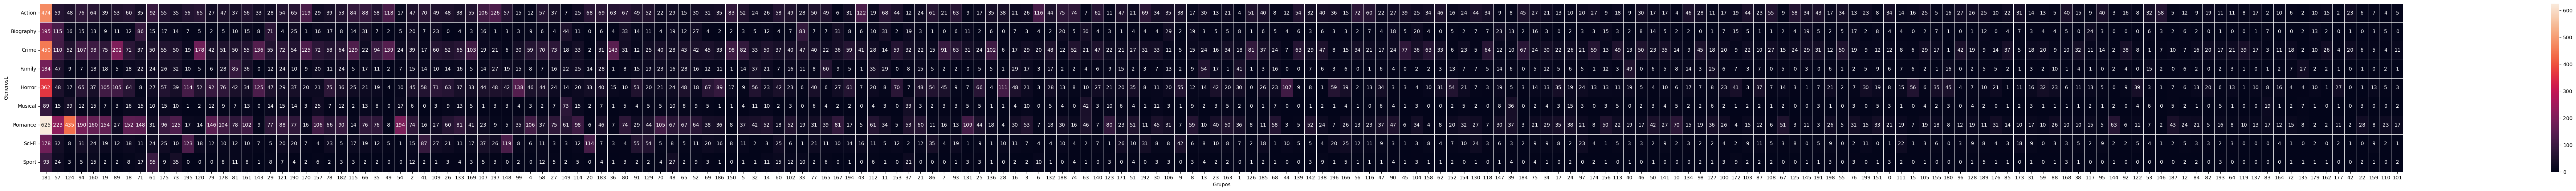

In [164]:
f, ax = plt.subplots(figsize=(105, 6))
sns.heatmap(generosXgrupos, annot=True, fmt="d", linewidths=0.5, ax=ax)

In [165]:
# Normalizando os valores das colunas
generos_norm = generosXgrupos.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
generos_norm

Grupos,181,57,124,94,160,19,89,18,71,61,...,72,135,179,162,177,42,22,159,110,101
GenerosL,,,,,,,,,,,,,,,,,,,,,
Action,0.718284,0.211538,0.104167,0.383784,0.346939,0.243421,0.255,0.361111,0.192857,0.964706,...,0.333333,0.074074,0.750000,0.576923,0.074074,1.000000,0.214286,0.538462,0.173913,0.294118
Biography,0.197761,0.480769,0.030093,0.054054,0.000000,0.046053,0.045,0.027778,0.557143,0.058824,...,0.000000,0.074074,1.000000,0.076923,0.000000,0.043478,0.000000,0.230769,0.217391,0.000000
Crime,0.673507,0.456731,0.113426,0.551351,0.578231,0.480263,1.000,0.437500,0.207143,0.470588,...,1.000000,0.074074,0.750000,1.000000,0.148148,0.869565,0.214286,0.384615,0.173913,0.647059
Family,0.177239,0.153846,0.013889,0.010811,0.034014,0.105263,0.015,0.069444,0.100000,0.164706,...,0.388889,1.000000,0.083333,0.076923,0.037037,0.000000,0.035714,0.000000,0.086957,0.058824
Horror,0.509328,0.158654,0.032407,0.324324,0.163265,0.677632,0.515,0.388889,0.000000,0.200000,...,0.222222,0.148148,0.750000,0.038462,1.000000,0.000000,0.035714,1.000000,0.217391,0.176471
Musical,0.000000,0.000000,0.083333,0.037838,0.013605,0.032895,0.005,0.055556,0.050000,0.000000,...,0.111111,0.259259,0.000000,0.000000,0.037037,0.000000,0.107143,0.000000,0.000000,0.117647
Romance,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.125,1.000000,1.000000,0.247059,...,0.833333,0.296296,0.083333,0.076923,0.407407,0.086957,1.000000,0.615385,1.000000,1.000000
Sci-Fi,0.166045,0.081731,0.011574,0.140541,0.074830,0.111842,0.050,0.069444,0.021429,0.164706,...,0.055556,0.000000,0.083333,0.000000,0.074074,0.043478,0.000000,0.692308,0.086957,0.058824
Sport,0.007463,0.043269,0.000000,0.000000,0.013605,0.000000,0.000,0.000000,0.064286,1.000000,...,0.055556,0.037037,0.000000,0.038462,0.000000,0.000000,0.071429,0.076923,0.000000,0.117647


<Axes: xlabel='Grupos', ylabel='GenerosL'>

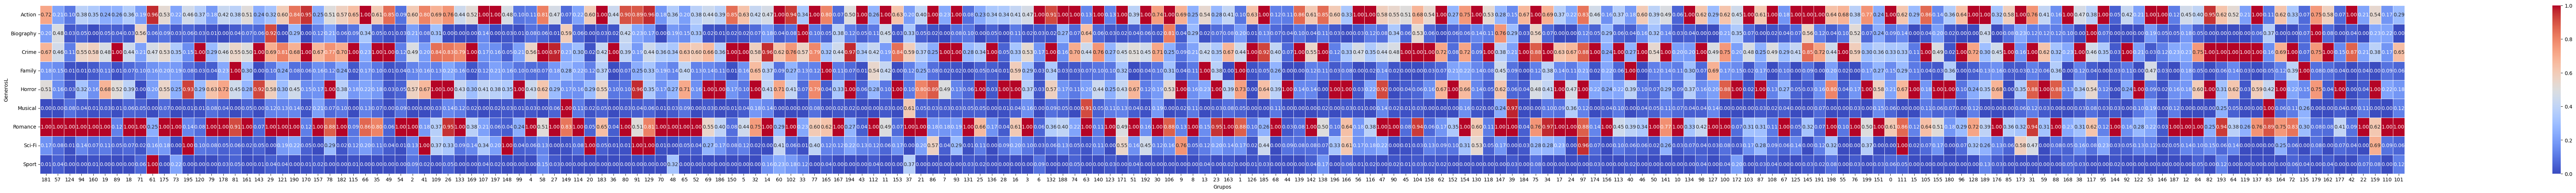

In [166]:
f, ax = plt.subplots(figsize=(105, 6))
sns.heatmap(generos_norm, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, ax=ax)

In [132]:
generos_prob = generosXgrupos.apply(lambda x: x / x.sum())
generos_prob

Grupos,53,21,12,57,52,54,34,17,14,15,...,50,10,2,58,49,11,19,37,51,27
GenerosL,,,,,,,,,,,,,,,,,,,,,
Action,0.202915,0.150982,0.114224,0.079383,0.110609,0.171591,0.096774,0.262233,0.177296,0.158708,...,0.395189,0.224138,0.083333,0.047794,0.280632,0.282158,0.117647,0.313830,0.120253,0.087302
Biography,0.069708,0.021717,0.270474,0.030871,0.032731,0.029545,0.016129,0.016311,0.022959,0.057584,...,0.010309,0.013793,0.006944,0.183824,0.083004,0.136929,0.037815,0.042553,0.075949,0.015873
Crime,0.179214,0.498449,0.150862,0.093716,0.167043,0.234091,0.132754,0.144291,0.209184,0.212079,...,0.453608,0.155172,0.222222,0.099265,0.197628,0.132780,0.218487,0.015957,0.221519,0.166667
Family,0.064639,0.012410,0.071121,0.018743,0.150113,0.057955,0.132754,0.031368,0.033163,0.043539,...,0.003436,0.010345,0.027778,0.036765,0.043478,0.033195,0.067227,0.292553,0.025316,0.063492
Horror,0.138023,0.198552,0.051724,0.035281,0.218962,0.111364,0.207196,0.303639,0.140306,0.199438,...,0.065292,0.462069,0.270833,0.051471,0.079051,0.041494,0.197479,0.069149,0.208861,0.325397
Musical,0.034221,0.008273,0.023707,0.069460,0.018059,0.037500,0.053350,0.015056,0.021684,0.023876,...,0.003436,0.013793,0.024306,0.272059,0.027668,0.020747,0.012605,0.063830,0.031646,0.023810
Romance,0.214829,0.061013,0.246767,0.654906,0.246050,0.281818,0.323821,0.102886,0.294643,0.203652,...,0.030928,0.027586,0.312500,0.297794,0.237154,0.323651,0.222689,0.202128,0.297468,0.277778
Sci-Fi,0.069962,0.046536,0.026940,0.011025,0.041761,0.048864,0.031017,0.114178,0.091837,0.078652,...,0.037801,0.093103,0.038194,0.007353,0.039526,0.016598,0.126050,0.000000,0.018987,0.039683
Sport,0.026489,0.002068,0.044181,0.006615,0.014673,0.027273,0.006203,0.010038,0.008929,0.022472,...,0.000000,0.000000,0.013889,0.003676,0.011858,0.012448,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Grupos', ylabel='GenerosL'>

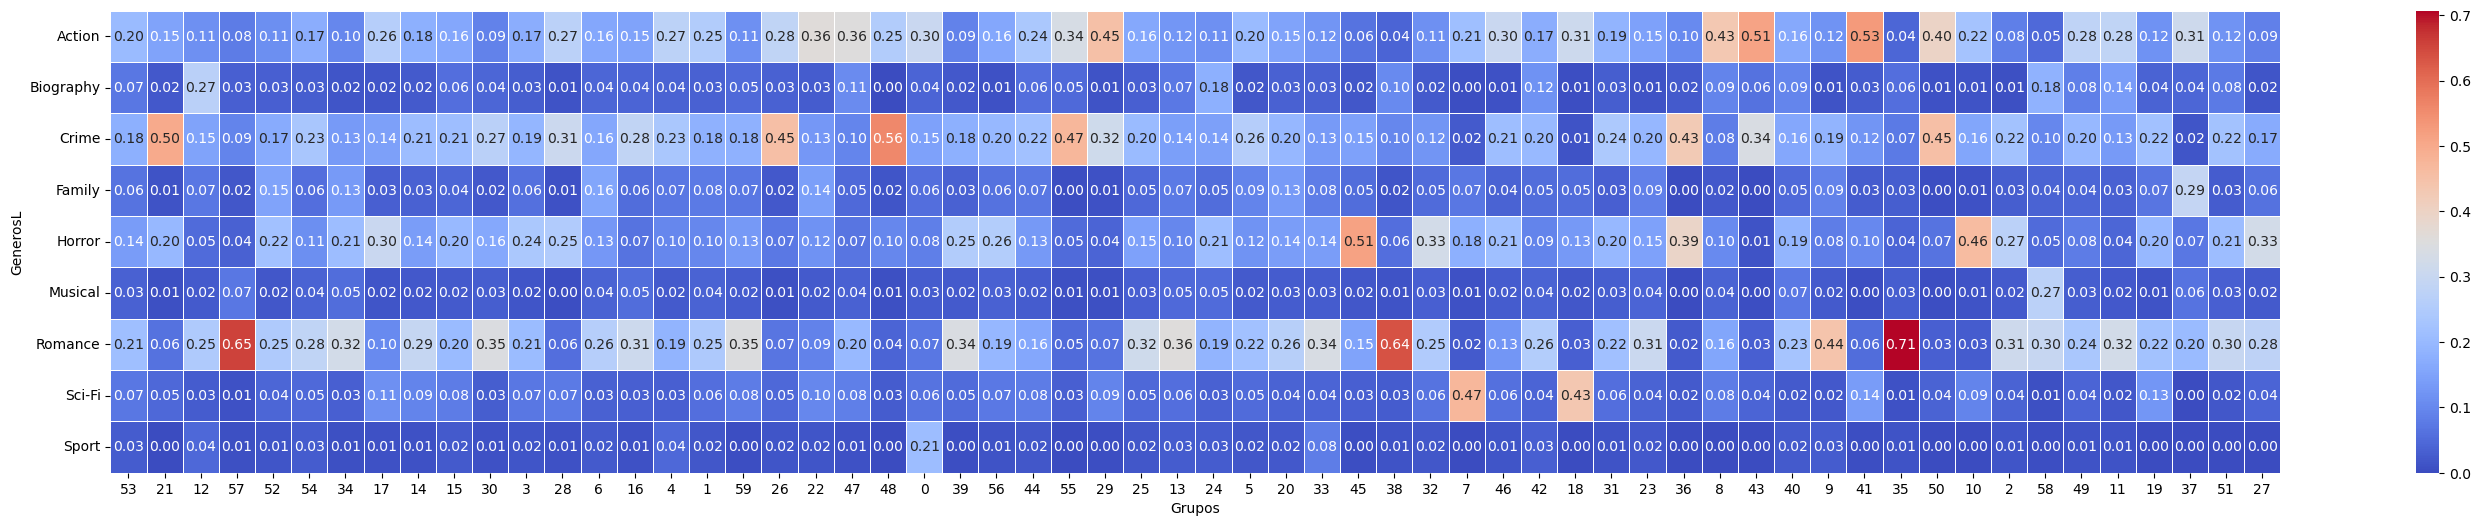

In [133]:
f, ax = plt.subplots(figsize=(35, 6))
sns.heatmap(generos_prob, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, ax=ax)

#### Tudo é Genero

In [ ]:
generosXgrupos = filmes_df_g[['genres', 'Grupos']]
generosXgrupos

In [ ]:
generosXgrupos = generosXgrupos.groupby(['genres', 'Grupos']).size().unstack(fill_value=0)
generosXgrupos

In [ ]:
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(generosXgrupos, annot=True, fmt="d", linewidths=0.5, ax=ax)

## Agrupamento Espectral

#### Construção da matriz de TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
filmes_df_low = filmes_df.sample(n=10000)

In [ ]:
# Cada linha do array é uma sinopse
D = [sin for sin in filmes_df_low.sinopse]

#### Usando Tokenizer Personalizado

In [ ]:
X = vectorizer.fit_transform(D)

### Usando SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
svd = make_pipeline(TruncatedSVD(n_components=3000), Normalizer(copy=False))

In [ ]:
svd.fit(X)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
u, s, vt = np.linalg.svd(X.todense())

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(s)),s)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$\sigma_k$',size=20)
plt.ylim(ymin = 0)
plt.xlim(xmin = -1)
plt.title(r'Singular Values of $\mathbf{X}$',size=20);

In [ ]:
fig = plt.figure(figsize=(7, 5))
plt.plot([i for i in range(1, svd[0].n_components + 1)], np.cumsum(svd[0].explained_variance_ratio_))
plt.xlabel(r'$k$ - Número de componentes principais')
plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada')

In [ ]:
X_REDUCED = svd.transform(X)

In [ ]:
X_REDUCED

### Algorimo Espectral

In [ ]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph
from numpy import linalg as LA

# 1 Construindo a matriz de adjacências do grafo de vizinhos mais próximos.
G = kneighbors_graph(X_REDUCED, n_neighbors = 7, include_self = True)
A = 0.5 * (G + G.T)

# 2 Construindo a Laplaciana Normalizada
L = csgraph.laplacian(A, normed = True).todense()

# 3 Obtendo os autovalores da Laplaciana Normalizada
# Valores já estão ordenados em ordem crescente.
values, _ = LA.eigh(L)

# 4 Plotando os valores dos 'gaps' e escolhendo um k adequado.
plt.scatter([i for i in range(1, 41)], values[:40])
plt.xlabel('Índice do autovalor')
plt.ylabel('Autovalor')

In [ ]:
from sklearn.cluster import SpectralClustering
k_groupsss = 16
m = SpectralClustering(n_clusters = k_groupsss, affinity = 'nearest_neighbors', n_neighbors = 5)
m.fit(X_REDUCED)

In [ ]:
y_kmeans = m.labels_

In [ ]:
len(y_kmeans)

### Analisando os Grupos

In [ ]:
filmes_df_g = filmes_df_low
filmes_df_g['Grupos'] = y_kmeans
# filmes_df_g

In [ ]:
filmes_df_g['GenerosL'] = filmes_df_g['genres']
filmes_df_g['GenerosL'] = filmes_df_g['GenerosL'].apply(lambda x: x.split(sep=','))
# filmes_df_g

In [ ]:
generosXgrupos = filmes_df_g[['GenerosL', 'Grupos']].explode('GenerosL')
generosXgrupos

In [ ]:
generosXgrupos = generosXgrupos.groupby(['GenerosL', 'Grupos']).size().unstack(fill_value=0)
generosXgrupos

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(generosXgrupos, annot=True, fmt="d", linewidths=0.5, ax=ax)

In [ ]:
generosXgrupos = filmes_df_g[['genres', 'Grupos']]
generosXgrupos

In [ ]:
generosXgrupos = generosXgrupos.groupby(['genres', 'Grupos']).size().unstack(fill_value=0)
generosXgrupos

In [ ]:
f, ax = plt.subplots(figsize=(9, 15))
sns.heatmap(generosXgrupos, annot=True, fmt="d", linewidths=0.5, ax=ax)

### Agrupamento Hierárquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering

m = AgglomerativeClustering(40, linkage = 'ward')
m.fit(X_REDUCED)

In [ ]:
y_kmeans = m.labels_

In [ ]:
filmes_df_g = filmes_df_low
filmes_df_g['Grupos'] = y_kmeans
# filmes_df_g

In [ ]:
filmes_df_g['GenerosL'] = filmes_df_g['genres']
filmes_df_g['GenerosL'] = filmes_df_g['GenerosL'].apply(lambda x: x.split(sep=','))

In [ ]:
generosXgrupos = filmes_df_g[['GenerosL', 'Grupos']].explode('GenerosL')
generosXgrupos

In [ ]:
generosXgrupos = generosXgrupos.groupby(['GenerosL', 'Grupos']).size().unstack(fill_value=0)
generosXgrupos

In [ ]:
f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(generosXgrupos, annot=True, fmt="d", linewidths=0.5, ax=ax)

In [ ]:
generos_norm = generosXgrupos.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
generos_norm

In [ ]:
f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(generos_norm, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, ax=ax)